**Исследование данных о закупках продуктов питания в США за период 2018-2019 годов**

# Шаг 1. Загрузка данных
## Скачайте набор данных (например, CSV-файл с данными о продажах, статистике, или любые другие данные, которые вас интересуют).

## Используйте библиотеку Pandas, чтобы загрузить данные в Python и создать DataFrame.

__В наборе данных сожержатся следующие столбцы:__

- Agency	- руководящий орган, ответственный за закупки продуктов питания, предоставляющий представление о выборе рациона питания в учреждениях.


- Time Period	- конкретная продолжительность закупок, охватывающая период с 2018 по 2019 год, указывающая на меняющиеся диетические тенденции с течением времени.


- Food Product Group	- Широкая классификация продуктов питания, охватывающая такие категории, как блюда или напитки, с указанием разнообразных кулинарных предпочтений.


- Food Product Category	- подробная подкатегория в рамках более широкой группы продуктов питания, позволяющая получить конкретное представление о предпочтениях в еде.


- Product Name	- Уникальное название, присвоенное каждому пищевому продукту, позволяющее точно идентифицировать его.


- Product Type	- подробное описание варианта продукта, содержащее подробные сведения о конкретном кулинарном предложении.


- Origin Detail	- Информация о происхождении продукта или источнике, проливающая свет на географическое разнообразие закупаемых продуктов.


- Distributor	- Компания, ответственная за дистрибуцию продуктов, с указанием ключевых участников цепочки поставок.


- Vendor	- Индивидуальный поставщик продуктов, повышающий степень детализации процесса закупок.


- № of Units	-  Количество закупленных единиц, позволяющее получить представление о масштабах деятельности по обеспечению продуктами питания.


- Total Weight in lbs	- Совокупный вес закупленных продуктов в фунтах, предоставляющий данные об объеме приобретенных продуктов.


- Total Cost - общие расходы, понесенные на закупку, с учетом финансового анализа практики закупок продуктов питания.

In [1]:
import pandas as pd # импортируем библиотеку для обработки датасетов
import matplotlib.pyplot as plt # импортируем библиотеку для построения графиков

In [2]:
# загрузим датасет в переменную data

data = pd.read_csv('C://Users//Sofia//Downloads//Good_Food_Purchasing_Data.csv')

# Шаг 2. Анализ данных

## Оцените общий вид данных: выведите первые несколько строк DataFrame, проверьте наличие пропущенных значений и типы данных столбцов.

In [3]:
# выведем первые пять строк датасета

data.head()

,Agency,Time Period,Food Product Group,Food Product Category,Product Name,Product Type,Origin Detail,Distributor,Vendor,# of Units,Total Weight in lbs,Total Cost
0,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 2 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,100.0,560.0
1,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 3 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,106.0,600.0
2,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, formula","Premium Nursette Ready-to-Feed Infant Formula,...",Enfamil,Babylab Inc.,Babylab Inc.,200.0,1200.0,16200.0
3,Administration for Childrens Services,2018-2019,Beverages,Beverages,"juice, fruit punch, ss","100% Juice Variety Pack, 4 fl oz bottles",Enfamil,Babylab Inc.,Babylab Inc.,100.0,600.0,1940.0
4,Administration for Childrens Services,2018-2019,Condiments & Snacks,Condiments & Snacks,"cereal, baby, oatmeal",Single Grain Oatmeal Baby Cereal,Enfamil,Babylab Inc.,Babylab Inc.,10.0,60.0,290.0


In [4]:
# посмотим общую информацию о данных и типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17208 entries, 0 to 17207
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agency                 17208 non-null  object 
 1   Time Period            17208 non-null  object 
 2   Food Product Group     17208 non-null  object 
 3   Food Product Category  17208 non-null  object 
 4   Product Name           17207 non-null  object 
 5   Product Type           17208 non-null  object 
 6   Origin Detail          15059 non-null  object 
 7   Distributor            16297 non-null  object 
 8   Vendor                 16722 non-null  object 
 9   # of Units             17152 non-null  float64
 10  Total Weight in lbs    17150 non-null  float64
 11  Total Cost             3767 non-null   float64
dtypes: float64(3), object(9)
memory usage: 1.6+ MB


Видим, что столбцы с 0 по 8 имеют тип данных object, с 9 по 11 - числа с плавающей точкой. Данные типы соответствуют заполнению колнок, изменять ничего не требуется.

In [5]:
# посмотрим количество строк и столбцов соответственно
data.shape

(17208, 12)

В наборе данных 17208 строк и 12 столбцов.

In [6]:
# посмотрим наличие пропусков

# получим абсолютное количество пропусков
missing_values = data.isnull().sum()

# получим общее количество значений в каждом столбце
total_values = data.shape[0]

# вычислим процентное содержание пропусков
percentage_missing = round((missing_values / total_values) * 100, 2)

# создадим новый датафрейм с помодью метода contact, параметр axis=1 выводит его по столбцам
missing_data = pd.concat([missing_values, percentage_missing], axis=1)

# назовем колонки
missing_data.columns = ['Missing Values', 'Percentage']

print(missing_data)

                       Missing Values  Percentage
Agency                              0        0.00
Time Period                         0        0.00
Food Product Group                  0        0.00
Food Product Category               0        0.00
Product Name                        1        0.01
Product Type                        0        0.00
Origin Detail                    2149       12.49
Distributor                       911        5.29
Vendor                            486        2.82
# of Units                         56        0.33
Total Weight in lbs                58        0.34
Total Cost                      13441       78.11


Столбец Total Cost содержит критическое количество пропусков и нет возможности их корректного заполнения. Данный столбец придется удалить. 

Также столбец Total Weight in lbs, в котором содержится объем закупок в фунтах, не имеет ценности для данного исследования. 

In [7]:
# создадим список столбцов для удаления
columns_to_drop = ['Total Cost', 'Total Weight in lbs']

# удалим столбцы
data = data.drop(columns=columns_to_drop, axis=1)

In [8]:
# посмотрим первые 5 строк обновленного датасета
data.head()

,Agency,Time Period,Food Product Group,Food Product Category,Product Name,Product Type,Origin Detail,Distributor,Vendor,# of Units
0,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 2 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0
1,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 3 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0
2,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, formula","Premium Nursette Ready-to-Feed Infant Formula,...",Enfamil,Babylab Inc.,Babylab Inc.,200.0
3,Administration for Childrens Services,2018-2019,Beverages,Beverages,"juice, fruit punch, ss","100% Juice Variety Pack, 4 fl oz bottles",Enfamil,Babylab Inc.,Babylab Inc.,100.0
4,Administration for Childrens Services,2018-2019,Condiments & Snacks,Condiments & Snacks,"cereal, baby, oatmeal",Single Grain Oatmeal Baby Cereal,Enfamil,Babylab Inc.,Babylab Inc.,10.0


## Выполните простой анализ данных, такой как подсчет средних значений, медианы, минимальных и максимальных значений для числовых столбцов.

In [9]:
print('Количество уникальных категорий продуктов:', data['Food Product Category'].nunique(), 'категорий.')

Количество уникальных категорий продуктов: 25 категорий.


In [10]:
# посмотрим названия уникалных категорий
data['Food Product Category'].unique()

array(['Meals', 'Beverages', 'Condiments & Snacks', 'Tree Nuts & Seeds',
       'Legumes', 'Grain Products', 'Beef', 'Cheese',
       'Turkey, Other Poultry', 'Rice', 'Fruit', 'Chicken', 'Yogurt',
       'Eggs', 'Seafood', 'Vegetables', 'Butter', 'Milk',
       'Roots & Tubers', 'Milk & Dairy', 'Meat', 'Pork',
       'Fish (Farm-Raised)', 'Fish (Wild)', 'Non-Food'], dtype=object)

Рассмотрим столбец '# of Units', содержащий количество закупленных товаров. 

Так как количество товаров не может быть меньше единицы, посмотрим, есть ли такие аномальные значения в столбце:

In [11]:
# найдем аномальные значения
filtered_data = data[data['# of Units'] < 1]

print('Количество строк, где менее 1 единицы товара:',(filtered_data['# of Units']).count())

Количество строк, где менее 1 единицы товара: 242


In [12]:
# найдем индексы строк, где значение '# of Units' меньше 1
indexes_to_drop = data[data['# of Units'] < 1].index

# удалим строки с найденными индексами
data = data.drop(indexes_to_drop)

Посмотрим описательные статистики по данному столбцу:

In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)

# смотрим описательные статистики для столбца '# of Units' в единицах
print(data['# of Units'].describe())

count      16910.00
mean       19432.66
std       603022.78
min            1.00
25%            3.00
50%           18.00
75%          222.75
max     50509470.00
Name: # of Units, dtype: float64


Статистика count - отражает количество значений в столбце.


mean - среднее значение, в данном случае оно не показательно, так как у нас абсолютно разные товары.


std - отражает разброс значений вокруг среднего значения, в данном случае так же не показательно, так как зависит от непоказательного среднего.


min - минимальное значение очевидно равно 1, так как менее 1 единицы товара закупить нельзя в данном случае нет закупки "половины" одного товара.


Менее 25% товаров закупаются в количестве до 3 штук.


Менее 50% товаров закупаются до 12 штук.


Менее 75 % товаров заупаются до 222 штук.


max - максимально было закуплено 50509470 единиц одного товара.


Посмотрим, что это за товар:

In [14]:
display(data[data['# of Units'] ==  50509470])

,Agency,Time Period,Food Product Group,Food Product Category,Product Name,Product Type,Origin Detail,Distributor,Vendor,# of Units
14645,Department of Education,2018-2019,Milk & Dairy,Milk,"milk, nonfat, chocolate",Milk Chocolate Fat Free,"Dairy Maid, USA, Maryland",NaN,NaN,50509470.00


Больше всего было закуплено шоколадного обезжиренного молока, произведенного в США, штате Мэрилэнд. 

# Шаг 3. Визуализация данных

## Используйте библиотеку Matplotlib, чтобы создать несколько графиков для визуализации данных. Например, можно построить гистограмму распределения данных или график зависимости между двумя столбцами.

## Добавьте заголовки графиков, подписи осей и легенду (если необходимо) для более четкой интерпретации.

Food Product Category
Milk                    285399832.00
Meals                    11069875.00
Grain Products           10841751.00
Fruit                     5375608.00
Vegetables                4365165.00
Condiments & Snacks       3574099.00
Beverages                 2249345.00
Chicken                   1233216.00
Roots & Tubers             925936.00
Yogurt                     905249.00
Cheese                     714609.00
Turkey, Other Poultry      590301.00
Beef                       410083.00
Seafood                    392002.00
Legumes                    201609.00
Tree Nuts & Seeds          120882.00
Non-Food                    76800.00
Rice                        54908.00
Fish (Wild)                 31860.00
Eggs                        19719.00
Pork                        14925.00
Fish (Farm-Raised)          14614.00
Milk & Dairy                10996.00
Meat                         8309.00
Butter                       4631.00
Name: # of Units, dtype: float64


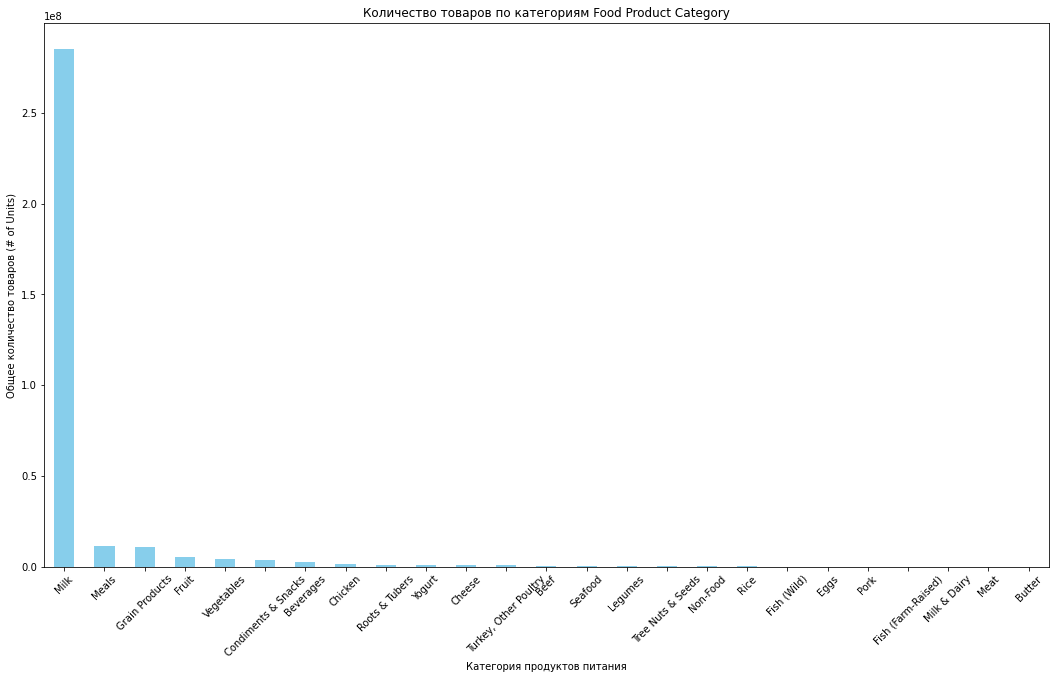

In [15]:
# сгруппируем данные по категориям 'Food Product Category' и подсчет суммы '# of Units' для каждой категории
grouped_data = data.groupby('Food Product Category')['# of Units'].sum().sort_values(ascending=False)

print(grouped_data.sort_values(ascending=False))

# построим столбчатую диаграмму
plt.figure(figsize=(18, 10))  # размер графика 

grouped_data.plot(kind='bar', color='skyblue')
plt.title('Количество товаров по категориям Food Product Category')
plt.xlabel('Категория продуктов питания')
plt.ylabel('Общее количество товаров (# of Units)')
plt.xticks(rotation=45)  # поворот подписей по оси X для удобства чтения

plt.show()

Видим, что наибольшее количество закупленных товаров приходится на категорию Молоко.

Построим новый график без этой категории для большей наглядности.

Food Product Category
Meals                   11069875.00
Grain Products          10841751.00
Fruit                    5375608.00
Vegetables               4365165.00
Condiments & Snacks      3574099.00
Beverages                2249345.00
Chicken                  1233216.00
Roots & Tubers            925936.00
Yogurt                    905249.00
Cheese                    714609.00
Turkey, Other Poultry     590301.00
Beef                      410083.00
Seafood                   392002.00
Legumes                   201609.00
Tree Nuts & Seeds         120882.00
Non-Food                   76800.00
Rice                       54908.00
Fish (Wild)                31860.00
Eggs                       19719.00
Pork                       14925.00
Fish (Farm-Raised)         14614.00
Milk & Dairy               10996.00
Meat                        8309.00
Butter                      4631.00
Name: # of Units, dtype: float64


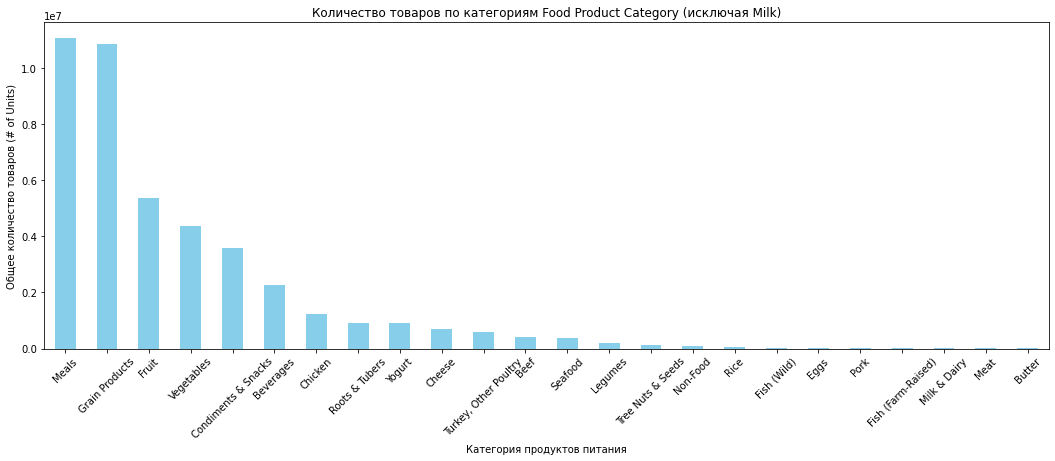

In [16]:
# исключим категорию 'Milk'
filtered_data = data[data['Food Product Category'] != 'Milk']

# сгруппируем отфильтрованные данные по категориям 'Food Product Category' и подсчету суммы '# of Units' для каждой категории
grouped_data = filtered_data.groupby('Food Product Category')['# of Units'].sum().sort_values(ascending=False)

print(grouped_data.sort_values(ascending=False))

# строим столбчатую диаграмму
plt.figure(figsize=(18, 6))  

grouped_data.plot(kind='bar', color='skyblue')
plt.title('Количество товаров по категориям Food Product Category (исключая Milk)')
plt.xlabel('Категория продуктов питания')
plt.ylabel('Общее количество товаров (# of Units)')
plt.xticks(rotation=45)  


plt.show()

На втором месте после молока продукты катерогии "Meals", что в контексте предостваленных данных не отражает, какие именно продукты входят в эту категорию. Наряду с данной категорией находится категория зерновых продуктов. 

Далее следуют фрукты и овощи, причем овощей закупается примерно на 1/5 меньше, чем фруктов.

Наименьшее количество товаров закуплено в категории Масло.

# Вывод

Был рассмотрен датасет с категориями закупаемых продуктов в США за период 2018 - 2019 годов.

Датасет состоит из 17208 сторок и 12 столбцов. 

Столбец Total Cost содержал критическое количество пропусков и без возможности их корректного заполнения. Данный столбец был удален. 

Также столбец Total Weight in lbs, в котором содержался объем закупок в фунтах, не имеел ценности для данного исследования, и был удален. 

Столбцы Food Product Group (9 групп) и Food Product Category (25 категорий) имеют практически одинаковые значения, за исключением того, что столбец с категориями имеет более мелкое дробление на категории.

Столбец Product Name имеет в себе ячейки с перечислением нескольких описательных характеристик товара, что затрудняет исследование его значений в разрезе по категориям, так как неоднотипных значений слишком много.


_________________________________________________________________________________________________________________________

Исходя из данных было выяснено, что за период с 2018 по 2019 год наибольшим числом закупок были товары категории Молоко, далее следовали товары из категории Meals  и крупы.

На третьем месте по закупкам были фрукты и овощи.

Меньше всего было закуплено товаров категории Масло.